## Multiple Linear Regression  Bike Sharing Assignment 

### Demand Prediction for BoomBikes

<b>BoomBikes</b> a US bike-sharing company has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands



The following steps are to be followed

<b>Step 1:</b> Reading, Understanding and Validating the Data
<br><b>Step 2:</b> Data Visualisation for continuous and categorical variables
<br><b>Step 3:</b> Data Preparation for the model
<br><b>Step 4:</b> Spliting the Training and Testing data and analysing the multi-collinearity.
<br><b>Step 5:</b> Model building with all features
<br><b>Step 6:</b> Backward Elimination and finding the best features
<br><b>Step 7:</b> Verify the selected features with Recursive feature elimination
<br><b>Step 8:</b> Residual Analysis on the trained model
<br><b>Step 9:</b> Final model building and prediction
<br><b>Step 10:</b> Model Evaluation


### Step 1: Reading, Understanding and Validating the Data

In [1]:
# Import Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For dateime and holiday validation
import datetime
import holidays

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# !pip install holidays

In [3]:
# Preprocessing Library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Stats model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
df['dteday'] = df['dteday'].apply(lambda x: datetime.datetime.strptime(x, '%d-%m-%Y'))

In [8]:
df['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [9]:
df['weekday'].value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [10]:
df['workingday'].value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [11]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [12]:
df.drop(columns = ['instant','casual','registered'], inplace=True)

### Data Inconsistency 

The data has no missing value we are going to create additional columns based on data dictionary and validate the existing columns using the dteday column

It is observed that the 2018-01-01 is on Monday but it was mentioned as Saturday in the data, Also on comparing with the provided list of US holidays, it is observed that there is inconsistency with the data, hence based on the dteday we are going to validate and change the columns weekday, workingday and holiday.<br>

For US the seasons is as follows

- Summer: June - August
- Fall: September - November
- Winter: December - February
- Spring: March - May

Hence the season column also needs to be fixed

In [13]:
season_map = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
yr_map = {2018:0, 2019:1}
holiday_map = {0:'no',1:'yes'}
workingday_map = {0:'Non-Working Day',1:'Working Day'}
weekday_map = {'Sun':0,'Mon':1,'Tue':2,'Wed':3,'Thu':4,'Fri':5,'Sat':6}
weathersit_map = {1:'Clear, Few clouds, Partly cloudy, Partly cloudy',
                  2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
                  3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
                  4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'}

In [14]:
monthint = list(range(1,13))
month_map ={}
for X in monthint:
    month = datetime.date(1900, X , 1).strftime('%b')
    month_map[X]=month
print(month_map)

{1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}


In [15]:
# Fix Year and month field from dteday field
df['year'] = df['dteday'].apply(lambda x: int((x).strftime("%Y")))
df['yr'] = df['year'].map(yr_map)
df['mnth'] = df['dteday'].apply(lambda x: int((x).strftime("%m")))

In [16]:
# Fix season from month field
def find_season(val):
    if val in [3,4,5]:
        return 1
    elif val in [6,7,8]:
        return 2
    elif val in [9,10,11]:
        return 3
    elif val in [12,1,2]:
        return 4
    

In [17]:
df['season'] = df['mnth'].apply(lambda x: find_season(x))

In [18]:
holiday_list = [ date for date in holidays.UnitedStates(years=[2018,2019])]
holiday_list

[datetime.date(2018, 1, 1),
 datetime.date(2018, 1, 15),
 datetime.date(2018, 2, 19),
 datetime.date(2018, 5, 28),
 datetime.date(2018, 7, 4),
 datetime.date(2018, 9, 3),
 datetime.date(2018, 10, 8),
 datetime.date(2018, 11, 11),
 datetime.date(2018, 11, 12),
 datetime.date(2018, 11, 22),
 datetime.date(2018, 12, 25),
 datetime.date(2019, 1, 1),
 datetime.date(2019, 1, 21),
 datetime.date(2019, 2, 18),
 datetime.date(2019, 5, 27),
 datetime.date(2019, 7, 4),
 datetime.date(2019, 9, 2),
 datetime.date(2019, 10, 14),
 datetime.date(2019, 11, 11),
 datetime.date(2019, 11, 28),
 datetime.date(2019, 12, 25)]

In [19]:
df['holiday'] = df['dteday'].apply(lambda x: 1 if x in holiday_list else 0)

In [20]:
# Fix weekday
df['day'] = df['dteday'].apply(lambda x: (x).strftime("%a"))
df['weekday'] = df['day'].map(weekday_map)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,day
0,2018-01-01,4,0,1,1,1,0,2,14.110847,18.18125,80.5833,10.749882,985,2018,Mon
1,2018-01-02,4,0,1,0,2,0,2,14.902598,17.68695,69.6087,16.652113,801,2018,Tue
2,2018-01-03,4,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,Wed
3,2018-01-04,4,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,Thu
4,2018-01-05,4,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,Fri


In [21]:
for index, row in df.iterrows():
    if ((row['holiday'] == 1) or (row['weekday'] in [0,6])):
        df.at[index, 'workingday'] = 0
    else:
        df.at[index, 'workingday'] = 1

#### Creating mapping columns from Data dictionary for Understanding

In [22]:
df['season_map'] = df['season'].map(season_map)
df['month_map'] = df['mnth'].map(month_map)
df['holiday_map'] = df['holiday'].map(holiday_map)
df['workingday_map'] = df['workingday'].map(workingday_map)
df['weathersit_map'] = df['weathersit'].map(weathersit_map)
df.head()


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,day,season_map,month_map,holiday_map,workingday_map,weathersit_map
0,2018-01-01,4,0,1,1,1,0,2,14.110847,18.18125,80.5833,10.749882,985,2018,Mon,winter,Jan,yes,Non-Working Day,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
1,2018-01-02,4,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,2018,Tue,winter,Jan,no,Working Day,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
2,2018-01-03,4,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,Wed,winter,Jan,no,Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy"
3,2018-01-04,4,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,Thu,winter,Jan,no,Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy"
4,2018-01-05,4,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,Fri,winter,Jan,no,Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy"


In [23]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'year', 'day',
       'season_map', 'month_map', 'holiday_map', 'workingday_map',
       'weathersit_map'],
      dtype='object')

#### Step 1: Inference 

The following observations are made on the features of the data

- <b>cnt</b> is the output feature i.e., the demand and the sum of casual and registered is equal to count, hence those two columns can be ignored
- The columns<b> temp, atemp, hum, windspeed</b> are the continuous input feature
- The columns <b> season, yr, mnth, holiday, weekday, workingday, weathersit</b> are categorical input features
- The column <b>instant</b> is a row number column which is of no use.
- There was inconsistency in the features season, holiday, weekday, workingday, they were fixed

Based on these observations <b>instant, casual and registered</b> are <b>dropped</b> at the initial level and the columns with inconsistency were corrected.


### Step 2: Data Visualisation for continuous and categorical variables


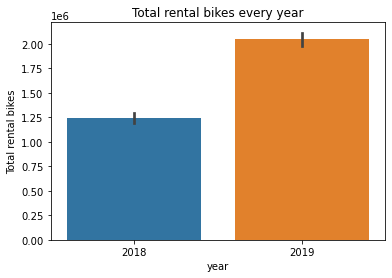

In [24]:
sns.barplot(x="year", y="cnt", data=df, estimator=sum)
plt.title('Total rental bikes every year')
plt.xlabel("year")
plt.ylabel('Total rental bikes')
plt.show()

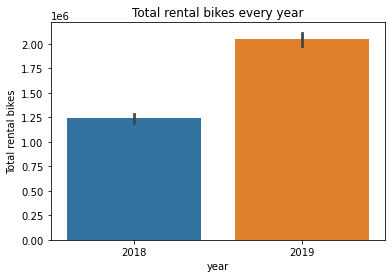

In [25]:
sns.barplot(x="year", y="cnt", data=df, estimator=sum)
plt.title('Total rental bikes every year')
plt.xlabel("year")
plt.ylabel('Total rental bikes')
plt.show()

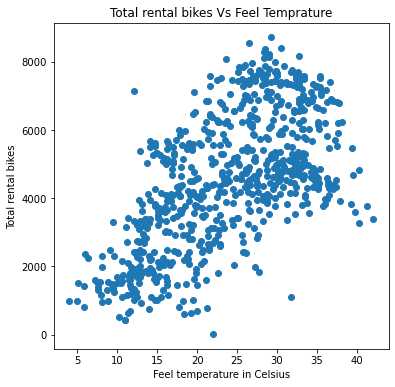

In [26]:
plt.figure(figsize=[6,6])
plt.scatter(df['atemp'], df['cnt'])
plt.title('Total rental bikes Vs Feel Temprature')
plt.xlabel("Feel temperature in Celsius")
plt.ylabel('Total rental bikes')
plt.show()

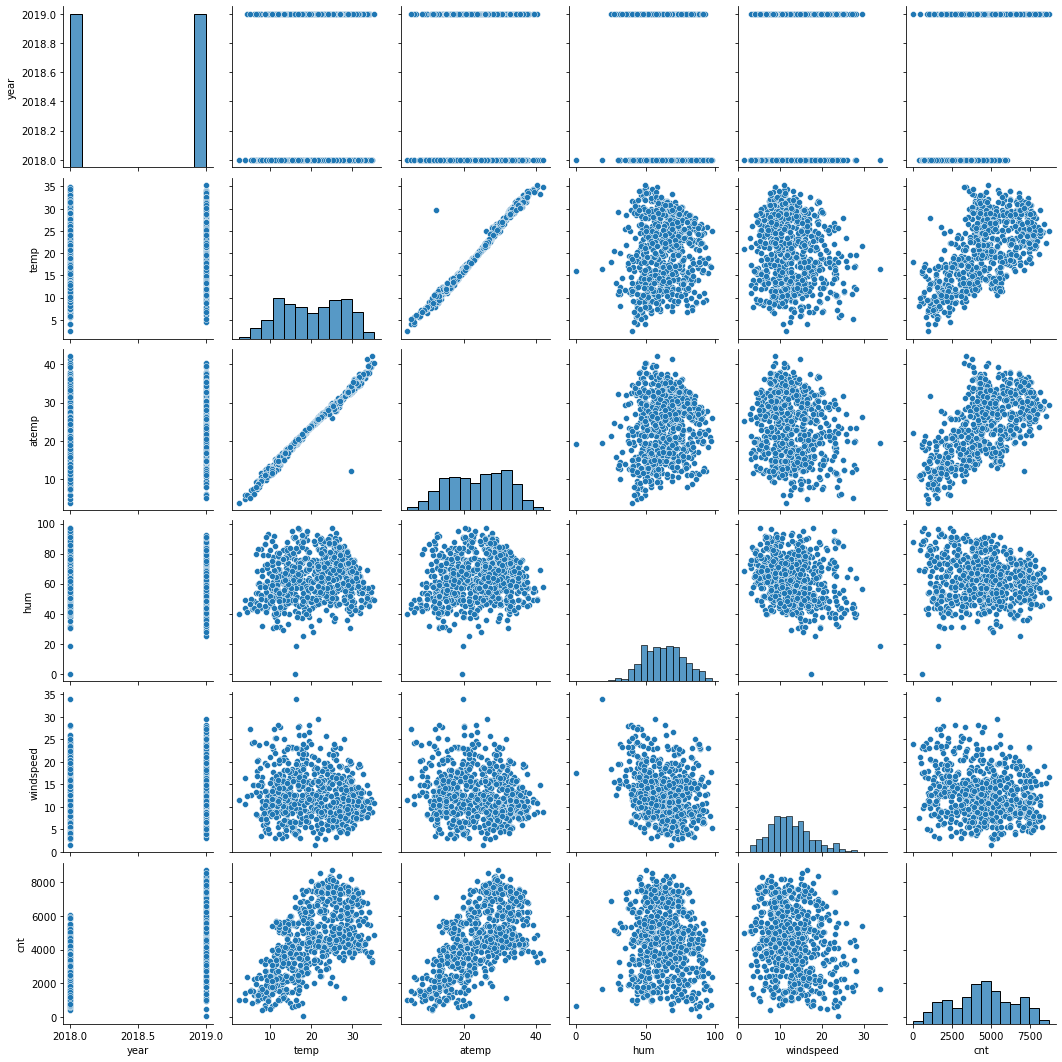

In [27]:
columns_plot = ['year','temp', 'atemp', 'hum', 'windspeed', 'cnt']
sns.pairplot(df[columns_plot])
plt.show()

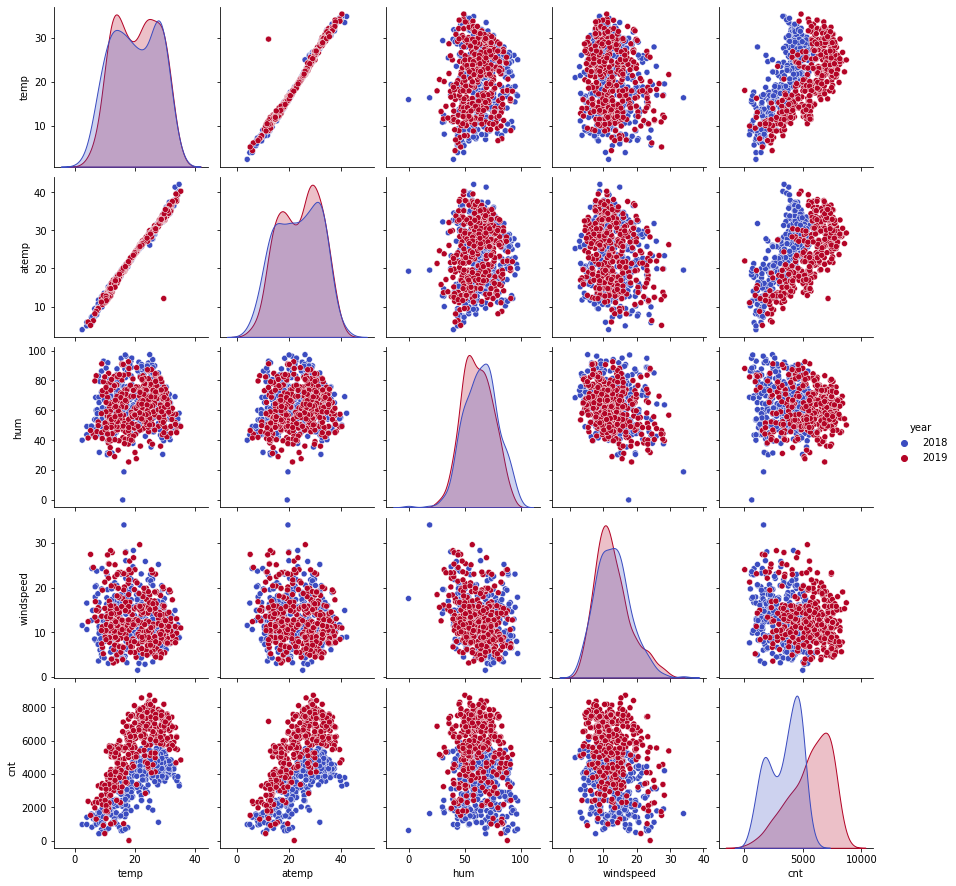

In [28]:
sns.pairplot(df[columns_plot], hue='year', palette='coolwarm')
plt.show()

From the above plot it is evident that the atemp and cnt has a linear relaionship between them, and there is a clear pattern between the year 2018 and 2019.

In [29]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'year', 'day',
       'season_map', 'month_map', 'holiday_map', 'workingday_map',
       'weathersit_map'],
      dtype='object')

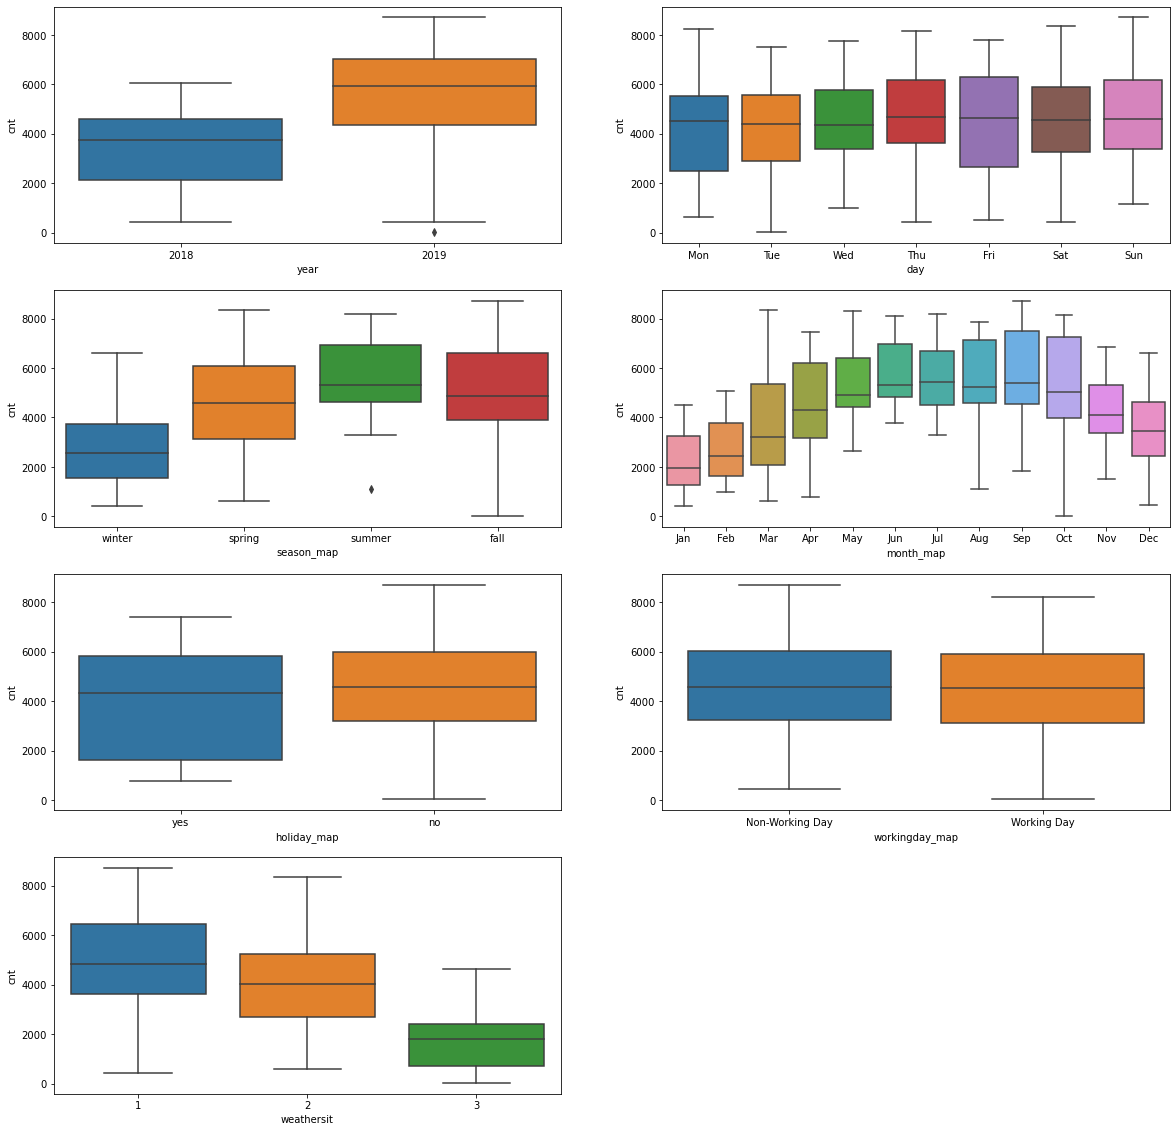

In [30]:
plt.figure(figsize=(20, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'year', y = 'cnt', data = df)
plt.subplot(4,2,2)
sns.boxplot(x = 'day', y = 'cnt', data = df)
plt.subplot(4,2,3)
sns.boxplot(x = 'season_map', y = 'cnt', data = df)
plt.subplot(4,2,4)
sns.boxplot(x = 'month_map', y = 'cnt', data = df)
plt.subplot(4,2,5)
sns.boxplot(x = 'holiday_map', y = 'cnt', data = df)
plt.subplot(4,2,6)
sns.boxplot(x = 'workingday_map', y = 'cnt', data = df)
plt.subplot(4,2,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

#### Step 2: Inference 

Based on the visualization it is evident that there lies a linear relationship between the atemp and cnt, and there was a high demand for bike rentals during the year 2019, when compared to that of 2018.

### Step 3: Data Preparation for the model

In [31]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,day,season_map,month_map,holiday_map,workingday_map,weathersit_map
0,2018-01-01,4,0,1,1,1,0,2,14.110847,18.18125,80.5833,10.749882,985,2018,Mon,winter,Jan,yes,Non-Working Day,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
1,2018-01-02,4,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,2018,Tue,winter,Jan,no,Working Day,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
2,2018-01-03,4,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,Wed,winter,Jan,no,Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy"
3,2018-01-04,4,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,Thu,winter,Jan,no,Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy"
4,2018-01-05,4,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,Fri,winter,Jan,no,Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy"


In [32]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'year', 'day',
       'season_map', 'month_map', 'holiday_map', 'workingday_map',
       'weathersit_map'],
      dtype='object')

In [33]:
df.drop(columns = ['dteday','year', 'day','season_map', 'month_map', 'holiday_map',
                   'workingday_map','weathersit_map', 'holiday'], inplace = True)
df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,4,0,1,1,0,2,14.110847,18.18125,80.5833,10.749882,985
1,4,0,1,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,4,0,1,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,0,1,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,4,0,1,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [34]:
df.columns

Index(['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

#### Step 3: Inference 

- The field <b>dtday</b> is not significant for model building, Hence it is dropped
- The field <b> holiday </b> is a redundant since, the workingday is a combination of holiday and weekends
- The following fields created for understanding the data were removed : 'year', 'day','season_map', 'month_map', 'holiday_map','workingday_map','weathersit_map'

### Step 4: Spliting the Training and Testing data and analysing the multi-collinearity.

In [35]:
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [36]:
print("df - ",df.shape)
print("df Train- ",df_train.shape)
print("df Test - ",df_test.shape)

df -  (730, 11)
df Train-  (510, 11)
df Test -  (220, 11)


In [37]:
scaler = MinMaxScaler()

In [38]:
df_train.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
576,2,1,7,3,1,1,29.246653,33.1448,70.4167,11.083475,7216
426,1,1,3,0,0,2,16.980847,20.6746,62.1250,10.792293,4066
728,4,1,12,1,1,1,10.489153,11.5850,48.3333,23.500518,1796
482,1,1,4,0,0,2,15.443347,18.8752,48.9583,8.708325,4220
111,1,0,4,0,0,2,13.803347,16.0977,72.9583,14.707907,1683


In [39]:
columns=list(df_train.columns)
df_train[columns] = scaler.fit_transform(df_train[columns])
df_train.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
576,0.333333,1.0,0.545455,0.500000,1.0,0.0,0.815169,0.766351,0.725633,0.264686,0.827658
426,0.000000,1.0,0.181818,0.000000,0.0,0.5,0.442393,0.438975,0.640189,0.255342,0.465255
728,1.000000,1.0,1.000000,0.166667,1.0,0.0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0.000000,1.0,0.272727,0.000000,0.0,0.5,0.395666,0.391735,0.504508,0.188475,0.482973
111,0.000000,0.0,0.272727,0.000000,0.0,0.5,0.345824,0.318819,0.751824,0.380981,0.191095


In [40]:
df_train.describe()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.489542,0.507843,0.503743,0.491830,0.705882,0.201961,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.372897,0.500429,0.315038,0.329528,0.456092,0.273944,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.181818,0.166667,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.333333,1.000000,0.545455,0.500000,1.000000,0.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.666667,1.000000,0.818182,0.833333,1.000000,0.500000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


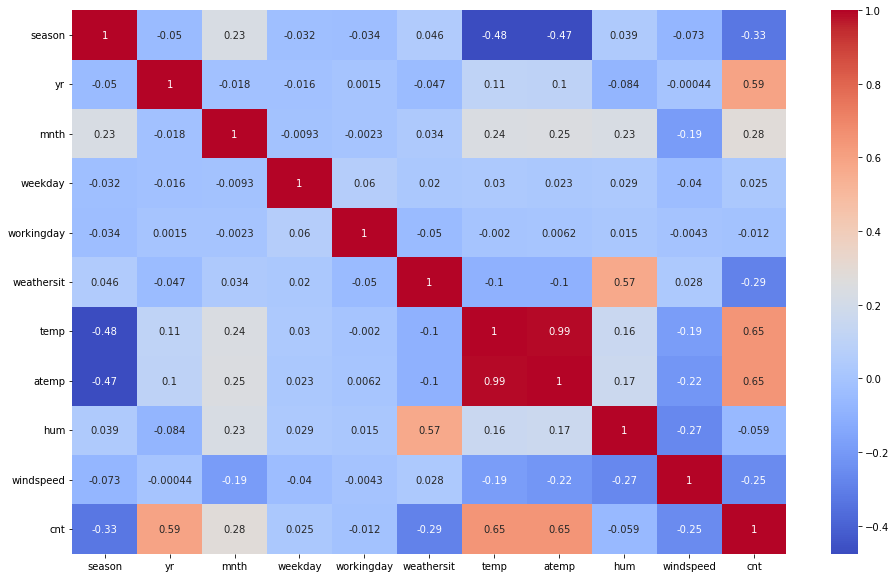

In [41]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="coolwarm")
plt.show()

In [42]:
# Split X train and y train
X_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:,-1]

In [43]:
# Split X test and y test
X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]


#### Step 4: Inference 

- The fields <b>temp & atemp</b>  are highly correlated, Let us decide if to keep the feature or not while model building.
- The next feature to be considered for model building are atemp and yr

### Step 5: Model building with all features

In [44]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [45]:
# Check the parameters obtained
lr.params

const         0.287992
season       -0.088906
yr            0.236868
mnth          0.152707
weekday       0.013948
workingday   -0.014007
weathersit   -0.147281
temp          0.206325
atemp         0.237329
hum          -0.100652
windspeed    -0.195138
dtype: float64

In [46]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     193.7
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.11e-164
Time:                        18:30:07   Log-Likelihood:                 443.16
No. Observations:                 510   AIC:                            -864.3
Df Residuals:                     499   BIC:                            -817.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2880      0.034      8.421      0.0

In [47]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif

,Features,VIF
0,const,56.67
1,season,1.60
2,yr,1.03
3,mnth,1.31
4,weekday,1.01
5,workingday,1.01
6,weathersit,1.65
7,temp,50.21
8,atemp,51.43
9,hum,1.84


In [48]:
pvalue = pd.DataFrame(lr.pvalues).reset_index()
pvalue.rename(columns={'index':'Features',0:'pvalue'},inplace=True)
pvalue['pvalue'] = round(pvalue['pvalue'], 3)
pvalue

,Features,pvalue
0,const,0.000
1,season,0.000
2,yr,0.000
3,mnth,0.000
4,weekday,0.315
5,workingday,0.164
6,weathersit,0.000
7,temp,0.149
8,atemp,0.123
9,hum,0.018


In [49]:
pd.merge(vif,pvalue,on='Features')

,Features,VIF,pvalue
0,const,56.67,0.000
1,season,1.60,0.000
2,yr,1.03,0.000
3,mnth,1.31,0.000
4,weekday,1.01,0.315
5,workingday,1.01,0.164
6,weathersit,1.65,0.000
7,temp,50.21,0.149
8,atemp,51.43,0.123
9,hum,1.84,0.018


#### Step 5: Inference 

From the above table it is evident that the VIF is high for temp and atemp, making it evident that out inference at <b>Step 4 is valid.</b> Hence it is recommended to consider removal of one feature.

### Step 6: Backward Elimination and finding the best features

In [50]:
X_train = X_train.drop('temp', 1)

In [51]:
X_train_lm = sm.add_constant(X_train)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [52]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     214.5
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.09e-165
Time:                        18:30:07   Log-Likelihood:                 442.10
No. Observations:                 510   AIC:                            -864.2
Df Residuals:                     500   BIC:                            -821.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2866      0.034      8.375      0.0

In [53]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)


pvalue = pd.DataFrame(lr_2.pvalues).reset_index()
pvalue.rename(columns={'index':'Features',0:'pvalue'},inplace=True)
pvalue['pvalue'] = round(pvalue['pvalue'], 3)

pd.merge(vif,pvalue,on='Features')

,Features,VIF,pvalue
0,const,56.62,0.000
1,season,1.60,0.000
2,yr,1.02,0.000
3,mnth,1.31,0.000
4,weekday,1.01,0.275
5,workingday,1.01,0.139
6,weathersit,1.65,0.000
7,atemp,1.76,0.000
8,hum,1.84,0.015
9,windspeed,1.19,0.000


In [54]:
X_train = X_train.drop('weekday', 1)

In [55]:
X_train_lm = sm.add_constant(X_train)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [56]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     241.0
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.36e-166
Time:                        18:30:07   Log-Likelihood:                 441.49
No. Observations:                 510   AIC:                            -865.0
Df Residuals:                     501   BIC:                            -826.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2941      0.034      8.769      0.0

In [57]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)


pvalue = pd.DataFrame(lr_3.pvalues).reset_index()
pvalue.rename(columns={'index':'Features',0:'pvalue'},inplace=True)
pvalue['pvalue'] = round(pvalue['pvalue'], 3)

pd.merge(vif,pvalue,on='Features')

,Features,VIF,pvalue
0,const,54.35,0.000
1,season,1.60,0.000
2,yr,1.02,0.000
3,mnth,1.31,0.000
4,workingday,1.01,0.157
5,weathersit,1.65,0.000
6,atemp,1.76,0.000
7,hum,1.84,0.015
8,windspeed,1.19,0.000


#### Step 6: Inference 

By doing the backward elimination it is evident that the features <b>temp, weekday</b> are insignificant for model building, because the Adjusted R square has no greater change while these fields were removed.

### Step 7: Verify the selected features with Recursive feature elimination

In [58]:
# Split X train and y train
X_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:,-1]

In [59]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 8)
rfe = rfe.fit(X_train, y_train)

In [60]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season', True, 1),
 ('yr', True, 1),
 ('mnth', True, 1),
 ('weekday', False, 3),
 ('workingday', False, 2),
 ('weathersit', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

#### Step 7: Inference 

Hence from the RFE its supports our previous findings that the fields weekday is insignificant

### Step 8: Residual Analysis on the trained model

In [61]:
y_train_cnt = lr_3.predict(X_train_lm)

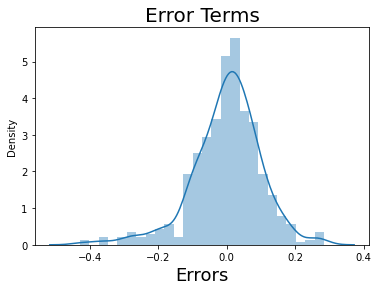

In [62]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt))
plt.title('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

#### Step 8: Inference 

The Error terms are normally distributed to the mean, hence we are good with the linear model with the training dataset

### Step 9: Final model building and prediction

In [63]:
df_train.columns

Index(['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [64]:
df_train.drop(columns=['temp','weekday'], inplace=True)

In [65]:
df_train.columns

Index(['season', 'yr', 'mnth', 'workingday', 'weathersit', 'atemp', 'hum',
       'windspeed', 'cnt'],
      dtype='object')

In [66]:
# Split X train and y train
X_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:,-1]

In [67]:
df_test[columns] = scaler.transform(df_test[columns])
df_test.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
184,0.333333,0.0,0.545455,0.500000,0.0,0.5,0.831783,0.769660,0.657364,0.084219,0.692706
535,0.333333,1.0,0.454545,0.666667,1.0,0.0,0.901354,0.842587,0.610133,0.153728,0.712034
299,0.666667,0.0,0.818182,1.000000,0.0,0.5,0.511964,0.496145,0.837699,0.334206,0.303382
221,0.333333,0.0,0.636364,0.833333,1.0,0.0,0.881625,0.795343,0.437098,0.339570,0.547400
152,0.333333,0.0,0.454545,1.000000,0.0,0.0,0.817246,0.741471,0.314298,0.537414,0.569029


In [68]:
df_test.drop(columns=['temp','weekday'], inplace=True)

In [69]:
# Split X test and y test
X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]

In [70]:
X_train_lm = sm.add_constant(X_train)
lr_final = sm.OLS(y_train, X_train_lm).fit()

In [71]:
y_train_pred = lr_final.predict(X_train_lm)

In [72]:
X_test_lm = sm.add_constant(X_test)

In [73]:
y_pred = lr_final.predict(X_test_lm)

#### Step 9: Inference

The final Linear model is built and the predictions are made on the y_test data set

### Step 10: Model Evaluation

Text(0, 0.5, 'y_pred')

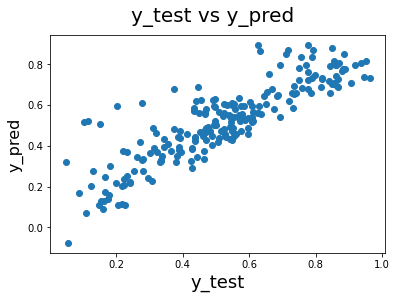

In [74]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [75]:
from sklearn.metrics import r2_score
print("R squared for y_train and y_train_pred" ,r2_score(y_train, y_train_pred))

R squared for y_train and y_train_pred 0.7937737759222268


In [76]:
from sklearn.metrics import r2_score
print("R squared for y_test and y_pred" ,r2_score(y_test, y_pred))

R squared for y_test and y_pred 0.750396937417025


#### Step 10: Inference 

From the above R squared values it is evident that the values of training and test R squares are 0.79 and 0.75 respectively.

### Conclusion

From all the steps performed in building the Multi Linear Regression model, it is evident that the features 'season', 'yr', 'mnth', 'workingday', 'weathersit', 'atemp', 'hum', 'windspeed' play a major role in forecasting the demand of bikes for rental. Also there were insignificant features like 'temp', 'weekday'.